In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot, pyplot as plt
import seaborn as sns

In [2]:
def createDF(file_name):
    """
    It reads the csv file, renames the columns, creates a binary column for the mood, and creates a column for the
    length of the lyrics

    :param file_name: the name of the file you want to import
    :return: A dataframe with the columns: lyrics, song name, valence, mood, length
    """
    # Import CSV file
    df = pd.read_csv(file_name, sep=',', index_col=[0])

    return df

In [3]:
from sklearn.pipeline import Pipeline

def trainModel(model, x_train, y_train):
    """
    It takes a model, a training set, and a training label, and returns a trained model

    :param model: the model to be trained
    :param x_raw_train: the training data
    :param y_train: the labels of the training data
    :return: The classifier is being returned.
    """
    classifier = Pipeline([('clf', model)])
    classifier.fit(x_train, y_train)
    return classifier

In [4]:
def evaluation(model, x_test, y_test):
    """
    It takes the model, the test data, and the test labels as input and prints out the confusion matrix, ROC-AUC score,
    accuraשcy score, precision score, recall score, and f1 score.

    :param lr2: the model
    :param x_raw_test: The test data
    :param y_test: The actual values of the target variable
    """
    # predict probabilities on Test and take probability for class 1([:1])
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    y_predict = model.predict(x_test)

    df_metrics = pd.DataFrame([])
    metrics = {}
    metrics['Roc-Auc'] = roc_auc_score(y_test, y_pred_prob)
    metrics['accuracy'] = accuracy_score(y_test, y_predict)
    metrics['precision'] = precision_score(y_test, y_predict)
    metrics['recall'] = recall_score(y_test, y_predict)
    metrics['f1'] = f1_score(y_test, y_predict, average='macro')
    df_metrics = pd.concat([df_metrics, pd.DataFrame(metrics, index=['Random forest']).T], axis=1)

    df_metrics.to_csv("5_Random forest Results After Fine Tuning.csv")
    
    return y_predict

In [5]:
def confusionMatrix(y_test, y_pred):

    # Create a confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    # Create heatmap from the confusion matrix

    class_names = [False, True]  # name  of classes
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    tick_marks = [0.5, 1.5]
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

In [6]:
file_name = '3_Optimization Data.csv'
RF_data = createDF(file_name)

In [7]:
x = RF_data.drop(columns='Mood', axis=1)
y = RF_data['Mood']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

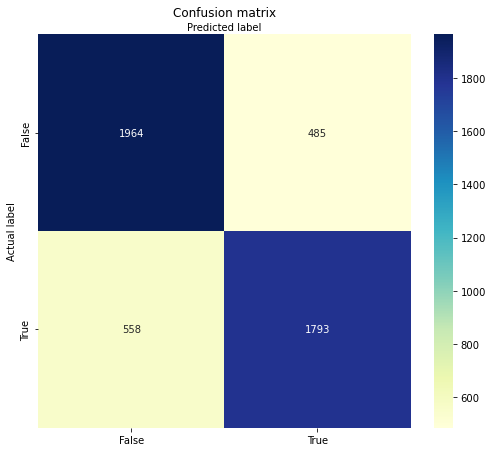

In [9]:
model = trainModel(RandomForestClassifier(bootstrap=False, max_depth=None, n_estimators=256), x_train, y_train)
y_pred = evaluation(model, x_test, y_test)
confusionMatrix(y_test, y_pred)